# 隔夜因子分析 (MIF - Market Inefficiency Factor)

**研究基础**: 国盛证券《如何将隔夜涨跌变为有效的选股因子?》研究报告

**因子特征**:
- **类型**: 技术指标，反转因子
- **方向**: 做多低 MIF 股票（信息优势较弱，被低估）
- **构建方法**: 多步骤中性化与正交化处理

**核心思想**:
- MIF 因子刻画知情交易者的信息优势
- 通过隔夜涨跌幅与换手率的相关性捕捉市场无效性
- 经过市值中性化和正交化处理，提取纯净的因子信号

**因子构建步骤**:
1. 计算"隔夜涨跌幅绝对值"与"昨日换手率"的滚动相关系数
2. 对相关系数因子进行市值中性化
3. 对"隔夜跳空因子"进行市值中性化
4. 正交化处理（回归取残差）得到最终 MIF

**分析流程**:
1. 导入标准化因子库函数
2. 配置回测参数
3. 执行因子计算与回测
4. 分析业绩表现与 IC
5. 可视化结果
6. 总结与优化建议

In [1]:
# ========================================
# 步骤 1: 导入标准化因子库
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 添加项目根目录到路径
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 导入隔夜因子标准化函数
from factor_library.technical.overnight_factor import run_overnight_factor_backtest

print("✅ 隔夜因子库导入成功")
print(f"项目根目录: {project_root}")

✅ 隔夜因子库导入成功
项目根目录: /Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform


## 步骤 2: 配置回测参数

根据研究报告配置 MIF 因子参数：
- **lookback_period**: 滚动计算周期（默认 20 天）
- **long_direction**: 'low' 做多低 MIF（反转策略）
- **rebalance_freq**: 调仓频率（周度/月度）
- **transaction_cost**: 交易成本 0.03%

In [2]:
# ========================================
# 步骤 2: 配置回测参数
# ========================================
config = {
    # 时间范围
    'start_date': '2020-01-01',
    'end_date': '2023-12-31',
    
    # MIF 参数
    'lookback_period': 20,           # 滚动计算周期
    
    # 回测参数
    'rebalance_freq': 'weekly',      # 调仓频率
    'transaction_cost': 0.0003,      # 0.03% 交易费用
    'long_direction': 'low',         # 做多低 MIF（反转因子）
}

print("回测配置:")
for key, value in config.items():
    print(f"  {key}: {value}")

回测配置:
  start_date: 2020-01-01
  end_date: 2023-12-31
  lookback_period: 20
  rebalance_freq: weekly
  transaction_cost: 0.0003
  long_direction: low


## 步骤 3: 执行因子计算与回测

使用标准化函数 `run_overnight_factor_backtest()` 一键完成：
1. 加载并准备数据
2. 计算隔夜收益率和换手率相关性
3. 执行市值中性化和正交化
4. 生成 MIF 因子值
5. 执行分组回测
6. 计算 IC 和业绩指标

In [3]:
# ========================================
# 步骤 3: 执行因子计算与回测
# ========================================
results = run_overnight_factor_backtest(**config)

print("\n" + "=" * 60)
print("回测执行完成！")
print("=" * 60)


开始计算隔夜因子 (MIF)...
 清洗后数据加载成功！
  数据类型: daily
  数据量: 10,216,839 条记录，13 列
 清洗后数据加载成功！
  数据类型: daily
  数据量: 10,216,839 条记录，13 列
  过滤后: 3,420,048 条记录 (过滤了 6,796,791 条)
  过滤后: 3,420,048 条记录 (过滤了 6,796,791 条)
 清洗后数据加载成功（重复调用，已省略详细信息）
 清洗后数据加载成功（重复调用，已省略详细信息）
  过滤后: 3,539,968 条记录 (过滤了 6,676,871 条)
  过滤后: 3,539,968 条记录 (过滤了 6,676,871 条)

计算隔夜因子 (MIF)...
回看周期: 20 天

[1/5] 计算中间变量...

计算隔夜因子 (MIF)...
回看周期: 20 天

[1/5] 计算中间变量...
[2/5] 计算 20 日滚动相关系数...
[2/5] 计算 20 日滚动相关系数...
[3/5] 对相关系数因子进行市值中性化...
[4/5] 对隔夜跳空因子进行市值中性化...
[3/5] 对相关系数因子进行市值中性化...
[4/5] 对隔夜跳空因子进行市值中性化...
[5/5] 对隔夜跳空因子进行正交化，生成 MIF...
[5/5] 对隔夜跳空因子进行正交化，生成 MIF...

MIF 因子计算完成！共 3389463 条记录
因子值范围: [-1.361954, 0.904001]

🔧 回测引擎初始化完成
   多头方向: low
   调仓频率: weekly
   交易费用: 0.030%
   因子名称: factor

MIF 因子计算完成！共 3389463 条记录
因子值范围: [-1.361954, 0.904001]

🔧 回测引擎初始化完成
   多头方向: low
   调仓频率: weekly
   交易费用: 0.030%
   因子名称: factor
 清洗后数据加载成功（重复调用，已省略详细信息）
 清洗后数据加载成功（重复调用，已省略详细信息）
  过滤后: 3,419,542 条记录 (过滤了 6,797,297 条)
  过滤后: 3,419,542 条记录 (过滤了 6,797,

## 步骤 4: 分析业绩表现

查看回测核心指标：
- **夏普比率**: 风险调整后收益
- **年化收益**: 策略年化表现
- **最大回撤**: 风险控制情况
- **IC 分析**: 因子预测能力

**注意**: 根据研究报告，MIF 是反转因子，IC 值通常为负

In [4]:
# ========================================
# 步骤 4: 分析业绩表现
# ========================================

# 提取业绩指标
metrics = results['performance_metrics']

print("隔夜因子 (MIF) 策略业绩总结 (Long_Only):")
print("-" * 50)
print(f"夏普比率:   {metrics['sharpe_ratio']:.3f}")
print(f"总收益:     {metrics['total_return']:.2%}")
print(f"年化收益:   {metrics['annualized_return']:.2%}")
print(f"年化波动:   {metrics['volatility']:.2%}")
print(f"最大回撤:   {metrics['max_drawdown']:.2%}")
print(f"调仓次数:   {metrics['rebalance_count']}")

# IC 分析
ic_series = results['analysis_results']['ic_series']
if ic_series is not None and not ic_series.empty:
    print("\nIC 分析:")
    print("-" * 50)
    print(f"IC 均值:    {ic_series.mean():.4f}")
    print(f"IC 标准差:  {ic_series.std():.4f}")
    icir = ic_series.mean() / ic_series.std() if ic_series.std() > 0 else np.nan
    print(f"ICIR:       {icir:.4f}")
    print(f"IC>0 占比:  {(ic_series > 0).mean():.2%}")
    print(f"IC<0 占比:  {(ic_series < 0).mean():.2%}")
    print("\n💡 研究报告显示: MIF 是反转因子，IC 均值通常为负（-0.028）")
    print("   ICIR 绝对值越大，因子越稳定（研报 ICIR = -2.43）")
else:
    print("\n⚠️  IC 分析数据不可用")

# 显示详细指标表
print("\n详细业绩指标:")
display(results['analysis_results']['metrics'])

隔夜因子 (MIF) 策略业绩总结 (Long_Only):
--------------------------------------------------
夏普比率:   0.282
总收益:     24.96%
年化收益:   5.98%
年化波动:   21.20%
最大回撤:   -29.07%
调仓次数:   204

IC 分析:
--------------------------------------------------
IC 均值:    -0.0011
IC 标准差:  0.0508
ICIR:       -0.0220
IC>0 占比:  48.81%
IC<0 占比:  51.19%

💡 研究报告显示: MIF 是反转因子，IC 均值通常为负（-0.028）
   ICIR 绝对值越大，因子越稳定（研报 ICIR = -2.43）

详细业绩指标:


,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Information Ratio (vs Benchmark)
Group_1,0.059942,0.211974,0.282779,-0.290649,NaN
Group_2,0.072937,0.208093,0.350503,-0.281611,NaN
Group_3,0.095441,0.203213,0.469660,-0.288769,NaN
Group_4,0.075424,0.200063,0.377003,-0.273036,NaN
Group_5,0.077670,0.192842,0.402762,-0.270111,NaN
Long_Short,-0.014396,0.055766,-0.258142,-0.169172,NaN
Long_Only,0.059793,0.211970,0.282081,-0.290665,NaN


## 步骤 5: 可视化分析

绘制四个核心图表：
1. **累计收益曲线**: 策略净值走势
2. **因子分布**: MIF 值的统计特征
3. **回撤曲线**: 风险暴露情况
4. **IC 时间序列**: 因子稳定性

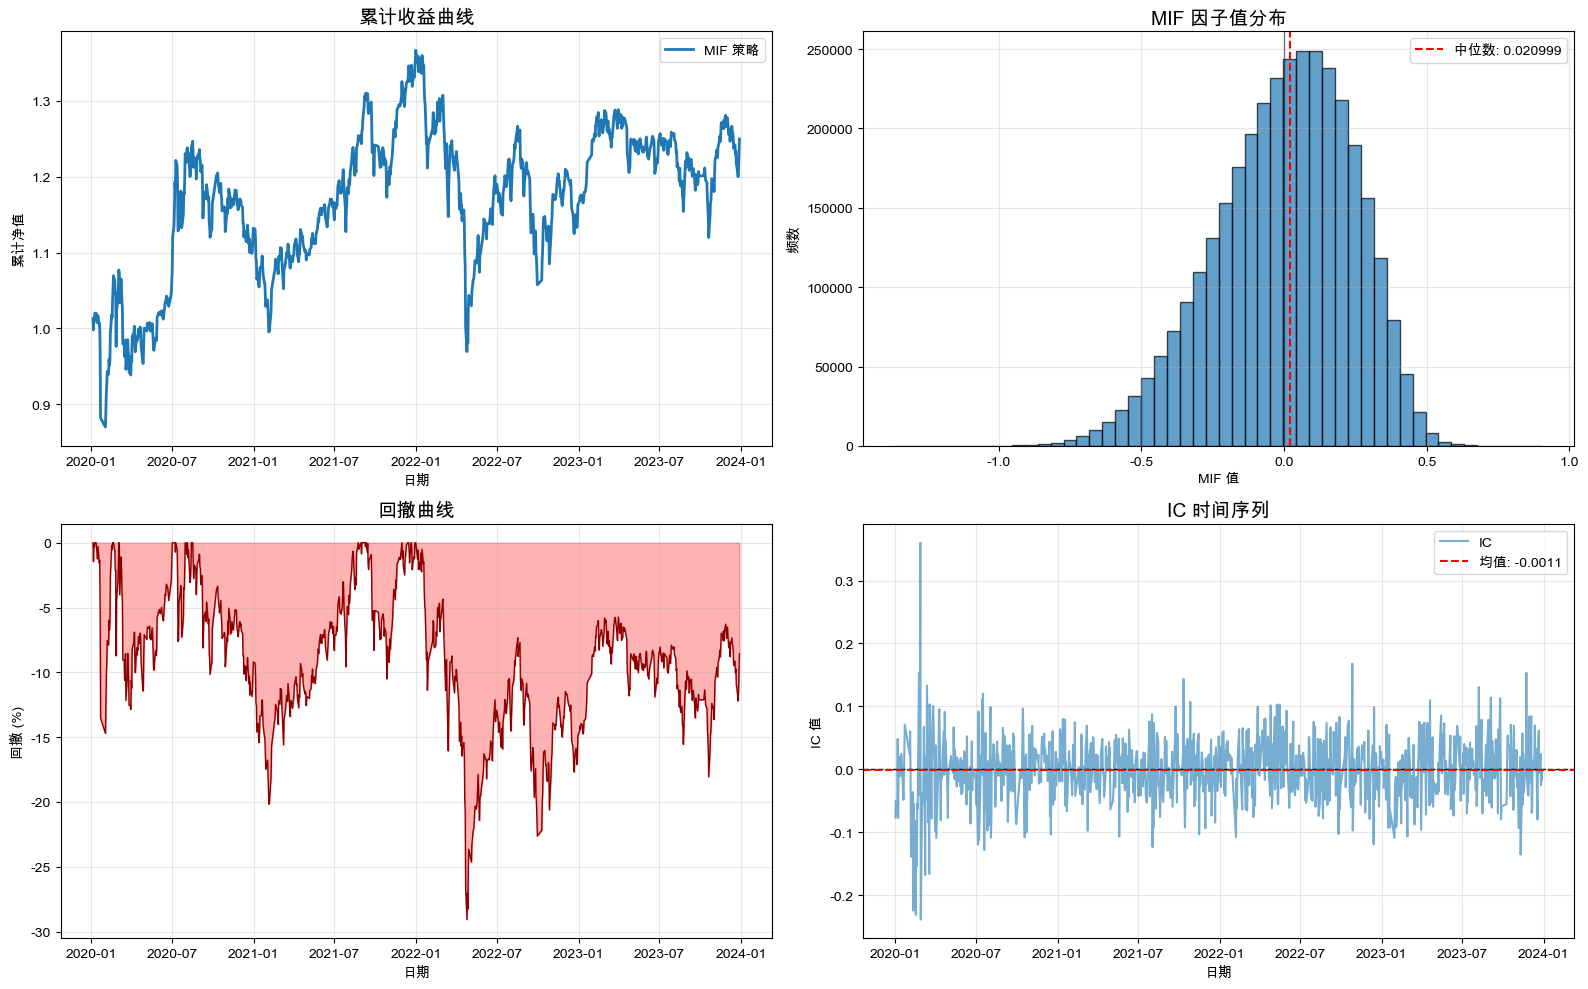

In [5]:
# ========================================
# 步骤 5: 可视化分析
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. 累计收益曲线
portfolio_returns = results['portfolio_returns']
if 'Long_Only' in portfolio_returns.columns:
    cumulative = (1 + portfolio_returns['Long_Only']).cumprod()
    axes[0, 0].plot(cumulative.index, cumulative.values, label='MIF 策略', linewidth=2)
    axes[0, 0].set_title('累计收益曲线', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('日期')
    axes[0, 0].set_ylabel('累计净值')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# 2. 因子分布
factor_values = results['factor_data']['factor'].values
axes[0, 1].hist(factor_values, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(np.median(factor_values), color='red', linestyle='--', 
                   label=f'中位数: {np.median(factor_values):.6f}')
axes[0, 1].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[0, 1].set_title('MIF 因子值分布', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('MIF 值')
axes[0, 1].set_ylabel('频数')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 回撤曲线
running_max = cumulative.cummax()
drawdown = (cumulative / running_max - 1) * 100
axes[1, 0].fill_between(drawdown.index, drawdown.values, 0, alpha=0.3, color='red')
axes[1, 0].plot(drawdown.index, drawdown.values, color='darkred', linewidth=1)
axes[1, 0].set_title('回撤曲线', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('日期')
axes[1, 0].set_ylabel('回撤 (%)')
axes[1, 0].grid(True, alpha=0.3)

# 4. IC 时间序列
if ic_series is not None and not ic_series.empty:
    axes[1, 1].plot(ic_series.index, ic_series.values, alpha=0.6, label='IC')
    axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[1, 1].axhline(ic_series.mean(), color='red', linestyle='--', 
                      label=f'均值: {ic_series.mean():.4f}')
    axes[1, 1].set_title('IC 时间序列', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('日期')
    axes[1, 1].set_ylabel('IC 值')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'IC 数据不可用', ha='center', va='center')
    axes[1, 1].set_title('IC 时间序列', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 步骤 6: 总结与优化建议

### 因子特性总结
- **MIF 反转因子**: 做多低 MIF 股票（信息优势较弱，被低估）
- **多步骤构建**: 相关系数 → 市值中性化 → 正交化
- **技术指标**: 基于隔夜涨跌幅和换手率，捕捉市场无效性

### 研究报告基准（2012-2022）
- **年化收益**: 10.91%
- **信息比率**: 2.49
- **IC 均值**: -0.028
- **ICIR**: -2.43

### 优化方向
1. **参数调优**: 
   - 测试不同 lookback_period（15/20/30 天）
   - 调整调仓频率（日度/周度/月度）
   
2. **因子增强**:
   - 行业中性化处理
   - 与其他反转因子组合
   - 动态权重调整

3. **风险控制**:
   - 添加止损机制
   - 波动率过滤
   - 极端值处理

4. **市场环境分析**:
   - 不同市场状态下的表现
   - 牛市 vs 熊市有效性
   - 流动性影响分析

### 注意事项
- ⚠️ **因子时效性**: 研究报告基于历史数据，需要验证当前市场环境下的有效性
- ⚠️ **IC 符号**: 负 IC 是正常的（反转因子特征），关注 ICIR 绝对值
- ⚠️ **分组单调性**: 期望 Group 1 > Group 2 > ... > Group 5（收益递减）
- ⚠️ **交易成本**: 高频调仓可能侵蚀收益，需要平衡调仓频率